In [8]:
import numpy as np
import pandas as pd
#import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt

In [9]:
# Reading the training data from Kaggle and the extracted box office
dataset_train = pd.read_csv('train.csv')
#dataset_mytest = pd.read_csv('kaggle_data/my_test.csv')
merged_dataset_nan = pd.read_excel('fwbo_kaggle_corrected.xls')
len(merged_dataset_nan)

3000

In [10]:
# Removing the films that have no information about the box office
#dataset_clean = dataset_mytest[~np.isnan(dataset_mytest.box_office)].reset_index(drop = True)
merged_dataset = merged_dataset_nan[~np.isnan(merged_dataset_nan.first_week_box_office)].reset_index(drop = True)
print(len(merged_dataset))
merged_dataset.head()

2058


,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,first_week_box_office
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,5963324.0
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,22956453.0
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,135388.0
3,8,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,tt0391024,en,Control Room,A chronicle which provides a rare window into ...,1.949044,...,84.0,"[{'iso_639_1': 'ar', 'name': 'العربية'}, {'iso...",Released,Different channels. Different truths.,Control Room,"[{'id': 917, 'name': 'journalism'}, {'id': 163...","[{'cast_id': 2, 'character': 'Himself', 'credi...","[{'credit_id': '52fe47a69251416c750a0daf', 'de...",2586511,27125.0
4,9,"[{'id': 256377, 'name': 'The Muppet Collection...",0,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",NaN,tt0117110,en,Muppet Treasure Island,After telling the story of Flint's last journe...,6.902423,...,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Set sail for Muppet mayhem!,Muppet Treasure Island,"[{'id': 2041, 'name': 'island'}, {'id': 4418, ...","[{'cast_id': 1, 'character': 'Long John Silver...","[{'credit_id': '52fe43c89251416c7501deb3', 'de...",34327391,7906689.0


In [ ]:
# Merging both datasets
#merged_dataset = pd.merge(dataset_train, dataset_clean)
#print(merged_dataset.shape)

In [8]:
# Saving the DataFrame merged_dataset
#merged_dataset.to_csv('merged_dataset.csv')

In [11]:
# Eliminating the useless columns
del merged_dataset['id']
del merged_dataset['homepage']
del merged_dataset['poster_path']
del merged_dataset['belongs_to_collection']
del merged_dataset['status']
del merged_dataset['original_title']
del merged_dataset['revenue']
#del merged_dataset['title'] ???
#del merged_dataset['cast'] ???
#del merged_dataset['crew'] ???

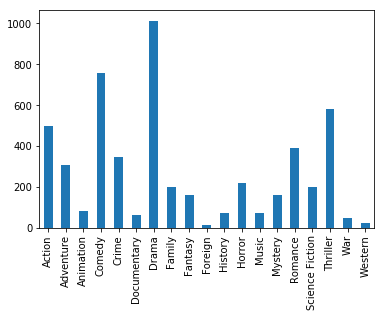

In [18]:
# Obtaining all the different GENRES
genres_list_names = []  # this list will be used to get the unique list of genres
for i in merged_dataset.genres:
    if not pd.isnull(i):
        genres_of_i = json_normalize(eval(i)).name.tolist()
        for j in genres_of_i:
            genres_list_names.append(j)
genres_list_unique = np.unique(genres_list_names)

### One-Hot-encoding
OHE_genres = pd.DataFrame([])
for i in genres_list_unique:
    OHE_genres = pd.concat([OHE_genres, merged_dataset.genres.str.contains(i)], axis = 1)
OHE_genres.columns = genres_list_unique
OHE_genres.head()

### OHE_genres represents the column "genres" One-Hot-Encoded. The only thing left is to eliminate
### one of the columns to get rid of the dummy variable trap
### Once the dummy variable is removed these columns should replace the columns "genres"
OHE_genres_total = OHE_genres.sum().plot.bar()

del merged_dataset['genres']

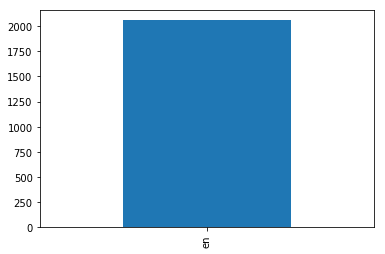

In [19]:
# Obtaining all the different ORIGINAL_LANGUAGE
original_language_list_unique = merged_dataset.original_language.unique()
OHE_original_language = pd.DataFrame([])
for i in original_language_list_unique:
    OHE_original_language = pd.concat([OHE_original_language, merged_dataset.original_language.str.contains(i)], axis = 1)
OHE_original_language.columns = original_language_list_unique
OHE_original_language.head()

OHE_original_language.sum().plot.bar()

del merged_dataset['original_language']

In [14]:
# Obtaining all the different PRODUCTION_COMPANIES
# NOTE: THERE ARE NANs, we might want to consider eliminating them
production_companies_list_names = []  # this list will be used to get the unique list of genres

for i in merged_dataset.production_companies:
    if not pd.isnull(i):
        production_companies_of_i = json_normalize(eval(i)).name.tolist()
        for j in production_companies_of_i:
            production_companies_list_names.append(j)
production_companies_list_unique = np.unique(production_companies_list_names)

### One-Hot-encoding
OHE_production_companies = pd.DataFrame([])
for i in production_companies_list_unique:
    OHE_production_companies = pd.concat([OHE_production_companies, merged_dataset.production_companies.str.contains(i)], axis = 1)
OHE_production_companies.columns = production_companies_list_unique
OHE_production_companies.head()

#OHE_production_companies.sum().plot.bar()

/home/diego/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  from ipykernel import kernelapp as app


,"""DIA"" Productions GmbH & Co. KG",1019 Entertainment,10th Hole Productions,120dB Films,1492 Pictures,1818,19 Entertainment,1984 Private Defense Contractors,2 Entertain,20th Century Fox Home Entertainment,...,iFeatures,icon,logan films,platinum studios,thinkfilm,uFilm,warner bross Turkey,Braeburn Entertainment,Check Entertainment,Österreichischer Rundfunk (ORF)
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [20]:
del merged_dataset['production_companies']

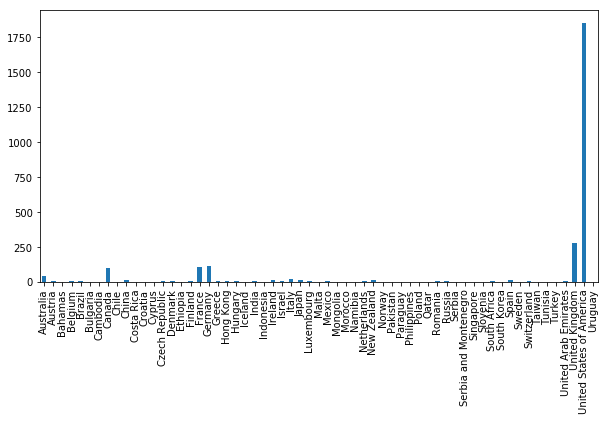

In [21]:
# Obtaining all the different PRODUCTION_COUNTRIES
production_countries_list_names = []  # this list will be used to get the unique list of genres

for i in merged_dataset.production_countries:
    if not pd.isnull(i):
        production_countries_of_i = json_normalize(eval(i)).name.tolist()
        for j in production_countries_of_i:
            production_countries_list_names.append(j)
production_countries_list_unique = np.unique(production_countries_list_names)

### One-Hot-encoding
OHE_production_countries = pd.DataFrame([])
for i in production_countries_list_unique:
    OHE_production_countries = pd.concat([OHE_production_countries, merged_dataset.production_countries.str.contains(i)], axis = 1)
OHE_production_countries.columns = production_countries_list_unique
OHE_production_countries.head()

OHE_production_countries.sum().plot.bar(figsize = (10, 5))

del merged_dataset['production_countries']

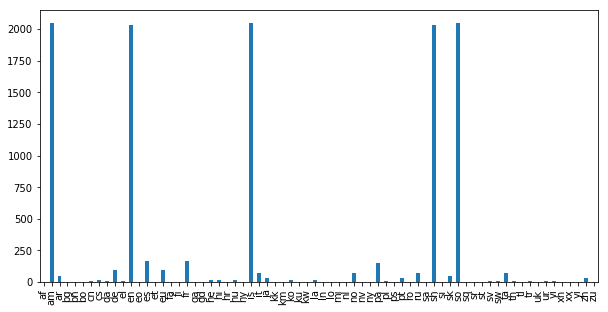

In [22]:
# Obtaining all the different SPOKEN_LANGUAGES
spoken_languages_list_names = []  # this list will be used to get the unique list of genres

for i in merged_dataset.spoken_languages:
    if not pd.isnull(i):
        spoken_languages_of_i = json_normalize(eval(i)).iso_639_1.tolist()
        for j in spoken_languages_of_i:
            spoken_languages_list_names.append(j)
spoken_languages_list_unique = np.unique(spoken_languages_list_names)

### One-Hot-encoding
OHE_spoken_languages = pd.DataFrame([])
for i in spoken_languages_list_unique:
    OHE_spoken_languages = pd.concat([OHE_spoken_languages,merged_dataset.spoken_languages.str.contains(i)], axis = 1)
OHE_spoken_languages.columns = spoken_languages_list_unique
OHE_spoken_languages.head()

OHE_spoken_languages.sum().plot.bar(figsize = (10, 5))

del merged_dataset['spoken_languages']

In [ ]:
# Obtaining all the different KEYWORDS
Keywords_list_names = []  # this list will be used to get the unique list of genres

for i in merged_dataset.Keywords:
    if not pd.isnull(i):
        Keywords_of_i = json_normalize(eval(i)).name.tolist()
        for j in Keywords_of_i:
            Keywords_list_names.append(j)
Keywords_list_unique = np.unique(Keywords_list_names)

### One-Hot-encoding
OHE_Keywords = pd.DataFrame([])
for i in Keywords_list_unique:
    OHE_Keywords = pd.concat([OHE_Keywords, merged_dataset.Keywords.str.contains(i)], axis = 1)
OHE_Keywords.columns = Keywords_list_unique
OHE_Keywords.head()

In [ ]:
# Obtaining all the different cast
cast_list_names = []

for i in merged_dataset.cast:
    if not pd.isnull(i):
        cast_of_i = json_normalize(eval(i)).name.tolist()
        for j in cast_of_i:
            cast_list_names.append(j)
cast_list_unique = np.unique(cast_list_names)

### One-Hot-encoding
OHE_cast = pd.DataFrame([])
for i in cast_list_unique:
    OHE_cast = pd.concat([OHE_cast, merged_dataset.cast.str.contains(i)], axis = 1)
OHE_cast.columns = cast_list_unique
OHE_cast.head()

In [ ]:
# Obtaining all the different crew
crew_list_names = []  # this list will be used to get the unique list of genres

for i in merged_dataset.crew:
    if not pd.isnull(i):
        crew_of_i = json_normalize(eval(i)).name.tolist()
        for j in crew_of_i:
            crew_list_names.append(j)
crew_list_unique = np.unique(crew_list_names)

### One-Hot-encoding
OHE_crew = pd.DataFrame([])
for i in crew_list_unique:
    OHE_crew = pd.concat([OHE_crew, merged_dataset.crew.str.contains(i)], axis = 1)
OHE_crew.columns = crew_list_unique
OHE_crew.head()

In [23]:
merged_dataset.head()

,budget,imdb_id,overview,popularity,release_date,runtime,tagline,title,Keywords,cast,crew,first_week_box_office
0,14000000,tt2637294,"When Lou, who has become the ""father of the In...",6.575393,2/20/15,93.0,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",5963324.0
1,40000000,tt0368933,Mia Thermopolis is now a college graduate and ...,8.248895,8/6/04,113.0,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",22956453.0
2,3300000,tt2582802,"Under the direction of a ruthless instructor, ...",64.299990,10/10/14,105.0,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",135388.0
3,0,tt0391024,A chronicle which provides a rare window into ...,1.949044,1/15/04,84.0,Different channels. Different truths.,Control Room,"[{'id': 917, 'name': 'journalism'}, {'id': 163...","[{'cast_id': 2, 'character': 'Himself', 'credi...","[{'credit_id': '52fe47a69251416c750a0daf', 'de...",27125.0
4,0,tt0117110,After telling the story of Flint's last journe...,6.902423,2/16/96,100.0,Set sail for Muppet mayhem!,Muppet Treasure Island,"[{'id': 2041, 'name': 'island'}, {'id': 4418, ...","[{'cast_id': 1, 'character': 'Long John Silver...","[{'credit_id': '52fe43c89251416c7501deb3', 'de...",7906689.0
